In [1]:
import requests
import json
import os
#dirname=os.chdir("/Users/shivamgoel/Desktop/Python/midterm/Question2")
dirname=input("Enter the current working directory")
os.chdir(dirname)# Set current working directory
os.getcwd() # Get current working directory  


Enter the current working directory/Users/shivamgoel/Desktop/Python/midterm/Question2/


'/Users/shivamgoel/Desktop/Python/midterm/Question2'

In [4]:
open_file = open('output/result.txt', 'r')
words_list =[]
contents = open_file.readlines()
for i in range(len(contents)):
    words_list.extend(contents[i].split())
     

In [5]:
len(words_list)

4697695

In [6]:
import re
def low(l):
    w=[w.lower() for w in l]
    return w
punctuations =re.compile('\W+|(\d+)')
result = lambda p: [word for word in p if not punctuations.match(word)]
lower=low(words_list)
filtwords=result(lower)

In [7]:
import csv
wfreq = {}

for w in filtwords:                             #Checking each word in the text and incrementing their recpective repetition count.
    if w not in wfreq:
        wfreq[w] = 1
    else:
        wfreq[w] += 1
with open('wordrank.csv', 'w') as csvfile:
    fieldnames = ['Word', 'Rank', 'Frequency']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    i=0
    for x in sorted(wfreq, key=wfreq.get, reverse=True):
        i +=1
        writer.writerow({'Word': x, 'Rank': i, 'Frequency': wfreq[x]})

In [9]:
with open('wordrank.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        W=[]
        R=[]
        F=[]
        for row in reader:
            W.append(row[0])
            R.append(row[1])
            F.append(row[2])
R.remove('Rank')
F.remove('Frequency')
len(W)

242401

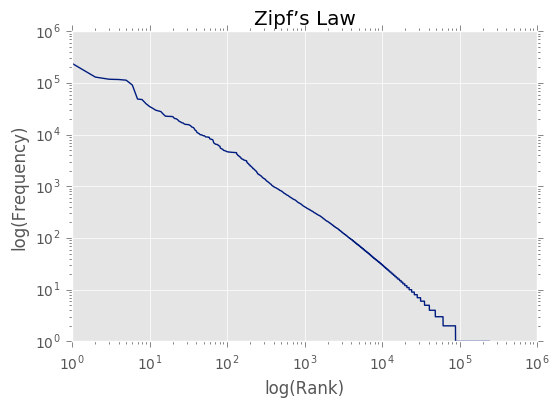

In [10]:
import matplotlib.pyplot as plt

exportFig = 'Graph.png'
plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')

plt.loglog(R,F)
plt.title("Zipf’s Law")
plt.ylabel('log(Frequency)')
plt.xlabel('log(Rank)')
plt.savefig(exportFig, bbox_inches='tight')

plt.show()

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go
trace2 = go.Scatter(
    x=R,
    y=F
)
data = [trace2]
layout = go.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='log',
        autorange=True
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

//anaconda/lib/python3.5/site-packages/plotly/plotly/plotly.py:215: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


//anaconda/lib/python3.5/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



# Plot of Top 50 Most Frequent Words

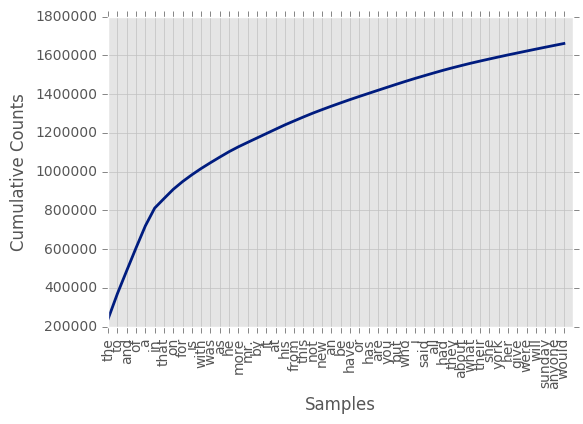

In [21]:
import nltk

fdist1 = FreqDist(filtwords)

fdist1.plot(50, cumulative=True)